In [1]:
import numpy as np
import pandas as pd
import model_constant_phi as md
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit 

In [2]:
import pylab
params = {'backend': 'ps',
          'axes.labelsize': 20,
          'legend.fontsize': 20,
          'legend.handlelength': 2.0,
          'legend.borderaxespad': 0,
          'xtick.labelsize': 20,
          'ytick.labelsize': 20,
          'font.family': 'serif',
          'font.size': 20,
          'font.weight': 'normal',
          #'font.serif': ['Palatino'],
          'ps.usedistiller': 'xpdf',
          'text.usetex': False}
pylab.rcParams.update(params)

In [3]:
# Main forcings
dt = 1 / 24
nyears = 2150  #simulation for 2150 years
ndays = nyears * 365
nsim = ndays * 1 / dt
nnpp=150*365*24

# Rainfall from Poisson
rain = md.poisson_process(n=int(nsim), alpha=0.5/100, lbd=(0.315 * dt))

# NPP simulated
tsim = np.linspace(1, nnpp, int(nnpp)) # Hour
# tsim = np.linspace(1, nsim, int(nsim)) # Hour
a = 650    # Fitted with annual values (NPP and time)
b = 15     # Fitted with annual values (NPP and time)

npp = ((a * tsim * dt / 365 / (b + tsim * dt / 365))) / 365-0.06

Text(0, 0.5, 'NPP (g C m$^{-2}$ yr$^{-1}$)')

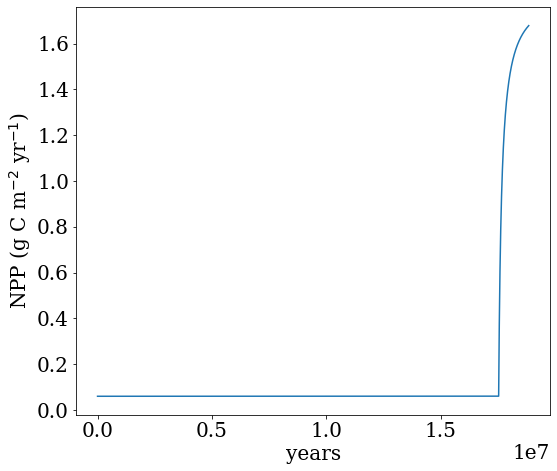

In [4]:
# 2000 years spin up of NPP as input for the carbon model

nspin=17528760 # representing years as hours for spin up i.e 2000*365*24

# Applying a heaviside function for the spin up
add_vec = np.ones(len(npp) + nspin, dtype = float)
add_vec[:nspin] = 0.06 
add_vec[nspin:] = add_vec[nspin:]*(npp+0.12)
npp = np.copy(add_vec)
fig = plt.figure(figsize=(8.5, 7.5))
plt.plot(add_vec[:])
plt.xlabel(r'years', fontsize=20)
plt.ylabel(r'NPP (g C m$^{-2}$ yr$^{-1}$)',fontsize=20)

In [5]:
#Hydraulic parameterization for constant porosity -------------------------------
alpha1 = 580   #hydraulic conductivity
beta1 = 6      #hydraulic conductivity
alpha2 = 580   #porosity
beta2 = 6      #porosity
kstex = 0.172  #m/d
kstot = 0.172  #m/d
phitex = 0.514  
phitot = 0.514  

In [6]:
# Simulation for 2150 years at constant porosity
sim = md.solve_long_run(rain, npp, kstex, kstot, phitex, phitot, alpha1, beta1, alpha2, beta2)
sim_year = sim.pivot_table(values=['s', 'phi', 'ksstr', 'P', 'DOC', 'A', 'M', 'B', 'Fa', 'Fpa','Flb','Fl', 'Flm', 'Fpl', 'Fbm','Fld', 'Fal','Flm','lk'],
                           index='Years',
                           aggfunc=np.mean)

100%|███████████████████████████████████████████████████████████████████| 18834000/18834000 [27:30<00:00, 11407.89it/s]
